In [6]:
#Using Google Colab Notebook to run .ipynb files

!pip install investpy #Installing library to Fetch Data
!pip install yfinance #Installing library to Fetch Date
!pip install kats     #Install KATS Library
# !pip install --upgrade pip

     |████████████████████████████████| 4.4 MB 11.8 MB/s 
     |████████████████████████████████| 235 kB 66.9 MB/s 
     |████████████████████████████████| 6.4 MB 55.2 MB/s 
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481592 sha256=30b5ee7610ace71a9c65a64cb329c82516c99a127b51d73bd9e0408335d855f4
  Stored in directory: /root/.cache/pip/wheels/96/a8/a5/0d33c72eaf00b41df7b9dc1e15d2b7c7154b3f1379ed350211
Successfully built investpy
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 63 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflict

In [4]:
#!pip install auto-ts  #It will install AUTO TS library , commented out as we are using KATS Forecasting library

In [7]:
#import libraries
from datetime import datetime, timedelta
import sys
import matplotlib.pyplot as plt
import warnings
from kats.consts import TimeSeriesData #already has lstm, and maybe all models
# from auto_ts import auto_timeseries #another auto ensembler

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm
import seaborn as sns
import investpy
from datetime import date
import plotly.graph_objects as go
import math
import yfinance as yf
import plotly.io as pio



##NIFTY 50 Forecasting Data



In [8]:
#Extracting Last 1 year data of NF using investpy library 
today = datetime.now()
today = today.strftime("%d/%m/%Y")
one_year= datetime.today() - timedelta(days=370)
one_year = one_year.strftime("%d/%m/%Y")

df = investpy.get_index_historical_data(index="Nifty 50",country="India",from_date=str(one_year),to_date= str(today))
df.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2021-05-10,14928.25,14966.90,14892.50,14942.35,510598578176,INR
2021-05-11,14789.70,14900.00,14771.40,14850.75,616204468224,INR
2021-05-12,14823.55,14824.05,14649.70,14696.50,620318228480,INR
2021-05-14,14749.40,14749.65,14591.90,14677.80,602738589696,INR
2021-05-17,14756.25,14938.00,14725.35,14923.15,534516170752,INR


In [9]:
df.index

DatetimeIndex(['2021-05-10', '2021-05-11', '2021-05-12', '2021-05-14',
               '2021-05-17', '2021-05-18', '2021-05-19', '2021-05-20',
               '2021-05-21', '2021-05-24',
               ...
               '2022-04-29', '2022-05-02', '2022-05-04', '2022-05-05',
               '2022-05-06', '2022-05-09', '2022-05-10', '2022-05-11',
               '2022-05-12', '2022-05-13'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)

In [10]:
df.reset_index(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      252 non-null    datetime64[ns]
 1   Open      252 non-null    float64       
 2   High      252 non-null    float64       
 3   Low       252 non-null    float64       
 4   Close     252 non-null    float64       
 5   Volume    252 non-null    int64         
 6   Currency  252 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 13.9+ KB


In [11]:
df_close = df[["Date","Close"]]
df_close

,Date,Close
0,2021-05-10,14942.35
1,2021-05-11,14850.75
2,2021-05-12,14696.50
3,2021-05-14,14677.80
4,2021-05-17,14923.15
...,...,...
247,2022-05-09,16301.85
248,2022-05-10,16240.05
249,2022-05-11,16167.10
250,2022-05-12,15808.00


In [12]:
df_close.info()
print(type(df_close))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    252 non-null    datetime64[ns]
 1   Close   252 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.1 KB
<class 'pandas.core.frame.DataFrame'>


In [13]:
#Adding 'time' and 'value' column in Dataframe as Columne name "Close" and "Date" is not working in Algo

df_close["time"] = df_close['Date']
df_close["value"] = df_close['Close']
del df_close["Date"]
del df_close["Close"]
df_close.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,time,value
0,2021-05-10,14942.35
1,2021-05-11,14850.75
2,2021-05-12,14696.50
3,2021-05-14,14677.80
4,2021-05-17,14923.15


In [14]:
#construct TimeSeriesData object for each time series
df_ts = TimeSeriesData(df_close)
print(type(df_ts.time))
print(type(df_ts.value))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


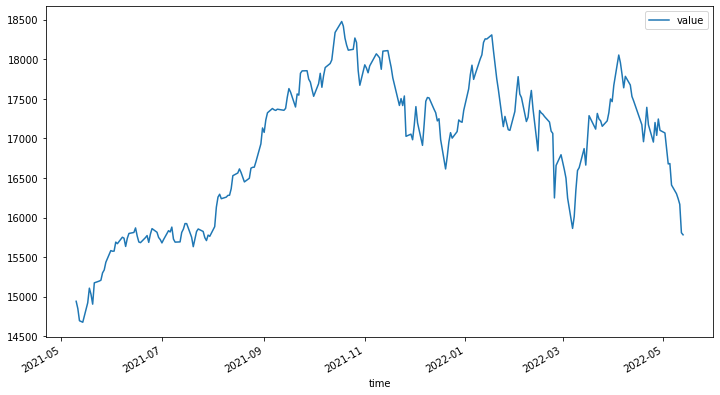

In [15]:
#plot current data
%matplotlib inline
#Must pass the name of the value columns to plot
df_ts.plot(cols=['value'])
plt.show()

In [ ]:
#convert to pandas.DataFrame 
df_ts.to_dataframe().tail()

,time,value
247,2022-05-09,16301.85
248,2022-05-10,16240.05
249,2022-05-11,16167.10
250,2022-05-12,15808.00
251,2022-05-13,15782.15


In [ ]:
#convert to numpy.ndarray
df_ts.to_array()[0:5]

array([[Timestamp('2021-05-10 00:00:00'), 14942.35],
       [Timestamp('2021-05-11 00:00:00'), 14850.75],
       [Timestamp('2021-05-12 00:00:00'), 14696.5],
       [Timestamp('2021-05-14 00:00:00'), 14677.8],
       [Timestamp('2021-05-17 00:00:00'), 14923.15]], dtype=object)

In [ ]:
df_ts.is_empty()

False

In [ ]:
df_ts.is_univariate()

True

In [ ]:
#import the param and model classes for Prophet, then LSTM model.
#Take 15 mins to build the model

from kats.models.prophet import ProphetModel, ProphetParams
from kats.models.lstm import LSTMForecast, LSTMParams, LSTMModel

params = ProphetParams(seasonality_mode='multiplicative')
m = ProphetModel(df_ts, params)
m.fit()
fcst = m.predict(steps=10,freq = "B")  
# #create a model param instance
params = LSTMParams(hidden_size=125,time_window=25,num_epochs=250) #hidden,time_window,epoch
#create a prophet model instance
m=LSTMModel(df_ts, params) 
#fit model simply by calling m.fit()
m.fit() 
#make prediction for next 0-24GMT (96 M15 periods)
fcst = m.predict(steps=10,freq="B")  #Forecasting for next 10 Business Day's, Saturday and Sunday will get eliminated as Nifty 50 Index is closed on Weekends

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#Forecasted Data
fcst.head(100)

,time,fcst,fcst_lower,fcst_upper
0,2022-05-16,16061.582964,15258.503816,16864.662112
1,2022-05-17,16264.511554,15451.285976,17077.737132
2,2022-05-18,16402.715787,15582.579998,17222.851577
3,2022-05-19,16605.469924,15775.196427,17435.743420
4,2022-05-20,16613.303780,15782.638591,17443.968969
5,2022-05-23,16710.044224,15874.542013,17545.546436
6,2022-05-24,17079.366788,16225.398449,17933.335127
7,2022-05-25,17213.411647,16352.741064,18074.082229
8,2022-05-26,17255.065968,16392.312670,18117.819266
9,2022-05-27,17277.989630,16414.090148,18141.889111


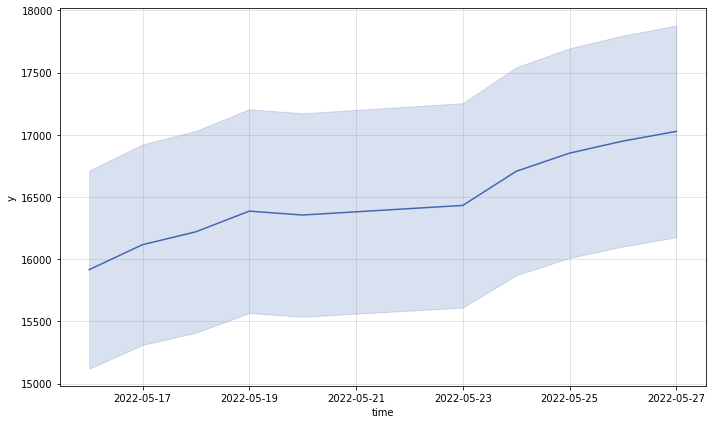

In [ ]:
m.plot()
# pd.plotting.register_matplotlib_converters()
# %matplotlib inline

# fig = m.plot()
# plt.xlim('2021-01-05','2021-12-06')
# plt.ylim(15000,20000)

In [ ]:
# fcst = fcst.set_index('time')
# df = df.set_index('Date')
fcst.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2022-05-16 to 2022-05-27
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fcst        10 non-null     float64
 1   fcst_lower  10 non-null     float64
 2   fcst_upper  10 non-null     float64
dtypes: float64(3)
memory usage: 320.0 bytes


In [ ]:
import plotly.graph_objects as go

fcst['fcst'] = fcst['fcst'].round(decimals = 2)
fcst['fcst_lower'] = fcst['fcst_lower'].round(decimals = 2)
fcst['fcst_upper'] = fcst['fcst_upper'].round(decimals = 2)

# Create traces
# fig.add_trace(go.Scatter(x=fcst.index, y=fcst['fcst'],name = 'Forecast Data'))
# fig.add_trace(go.Scatter(x=fcst.index, y=fcst['fcst_lower'],name = 'Lower Forecast Band',line_color = 'red',line = {'dash': 'dash'},opacity = 0.5))
# fig.add_trace(go.Scatter(x=fcst.index, y=fcst['fcst_upper'],name = 'Upper Forecast Band',line_color = 'green',line = {'dash': 'dash'},opacity = 0.5))
# fig.add_trace(go.Scatter(x=df.index, y=df.Close,mode='lines+markers',name='Actual Data'))

#https://plotly.com/python/continuous-error-bars/

fig = go.Figure([
    go.Scatter(
        name='Forecast Data',
        x=fcst.index,
        y=fcst['fcst'],
        mode='lines',
        line=dict(color='rgb(50, 119, 180)'),
    ),
    go.Scatter(
        name='Actual Data',
        x=df.index,
        y=df['Close'],
        mode='lines+markers',
        fill='tonexty',
        line=dict(color='blue'),
    ),
    go.Scatter(
        name='Upper Bound',
        x=fcst.index,
        y=fcst['fcst_upper'],
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        marker=dict(color="green"),
        line=dict(width=1.5),
        showlegend=False
    ),
    go.Scatter(
        name='Lower Bound',
        x=fcst.index,
        y=fcst['fcst_lower'],
        marker=dict(color="red"),
        line=dict(width=1.5),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=False
    )
])

#Omitting Test Data, Testing Forcasting Model on Complete Data instead Training Dataset
# fig.add_trace(go.Scatter(x=test_data.index, y=test_data.Close,mode='lines+markers', name='Test Data')) 

fig.update_layout(title='Nifty50 Last 1 Year Chart with Actual and Forecasted Data using KATS Algo',yaxis_title='Nifty 50',yaxis_tickformat= "000")
fig.update_traces( hovertemplate=None)
# fig.update_layout(hovermode="x")
fig.update_layout(hovermode="x unified")

fig.update_layout( xaxis_tickformat = ' %d %B (%a) %Y')
fig.show()

#Converting viz into HTML file
# pio.write_html(fig, file='Nifty50 Last 1 Year Chart with Actual and Forecasted Data using KATS Algo.html', auto_open=True)

##EURUSD Currency Forecasting Example

**Do not Execute below cells, it's just for example**

In [ ]:
import sys
sys.modules.keys()

dict_keys(['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_abc', '_bootlocale', '_locale', 'warnings', 're', 'enum', 'types', '_collections', 'sre_compile', '_sre', 'sre_parse', 'sre_constants', 'functools', '_functools', 'collections', '_collections_abc', 'operator', '_operator', 'keyword', 'heapq', '_heapq', 'itertools', 'reprlib', 'copyreg', 'site', 'os', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_sitebuiltins', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'importlib.util', 'importlib.abc', 'importlib.machinery', 'contextlib', 'google', 'google.cloud', 'google.logging', 'mpl_toolkits', 'sphinxcontrib', 'sitecustomize', 'runpy', 'pkgutil', 'weakref', '_weakrefset', 'ipykernel', 'ipykernel._version', 'ipykernel

In [ ]:
warnings.simplefilter(action='ignore')
sys.path.append("../")

In [ ]:
#import data file
header = ["date","time","value"]
df = pd.read_csv("EURUSD1440.csv", usecols=range(0,3), names=header)

In [ ]:
#check data file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12702 entries, 0 to 12701
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    12702 non-null  object 
 1   time    12702 non-null  object 
 2   value   12702 non-null  float64
dtypes: float64(1), object(2)
memory usage: 297.8+ KB


In [ ]:
df.head()

,date,time,value
0,1971.01.04,00:00,0.5369
1,1971.01.05,00:00,0.5366
2,1971.01.06,00:00,0.5365
3,1971.01.07,00:00,0.5368
4,1971.01.08,00:00,0.5371


In [ ]:
#pd.to_datetime
df["time"] = pd.to_datetime(df['date']+' '+df['time'])
df_df = df[["time","value"]]
df_df = df_df.tail(100)

In [ ]:
#show pd.datetime applied
df_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 12602 to 12701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    100 non-null    datetime64[ns]
 1   value   100 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 KB


In [ ]:
df.tail()

,date,time,value
12697,2021.06.30,2021-06-30,1.18968
12698,2021.07.01,2021-07-01,1.18547
12699,2021.07.02,2021-07-02,1.18488
12700,2021.07.05,2021-07-05,1.18590
12701,2021.07.06,2021-07-06,1.18597


In [ ]:
#construct TimeSeriesData object for each time series
df_ts = TimeSeriesData(df_df)
print(type(df_ts.time))
print(type(df_ts.value))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


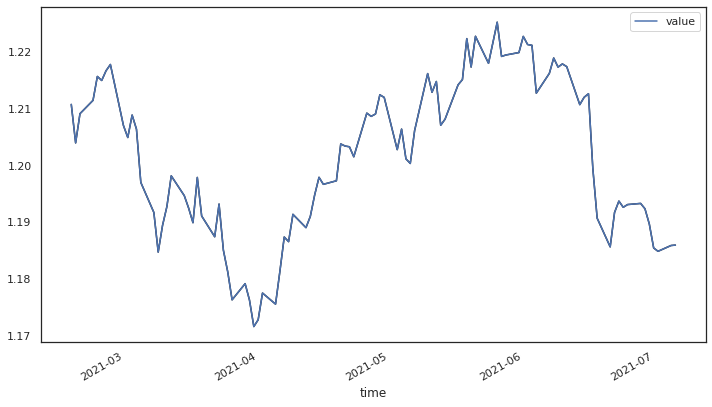

In [ ]:
#plot current data
%matplotlib inline
#Must pass the name of the value columns to plot
df_ts.plot(cols=['value'])
plt.show()

In [ ]:
#examples below in case needed in the future

In [ ]:
#convert to pandas.DataFrame 
df_ts.to_dataframe().tail()

,time,value
95,2021-06-30,1.18968
96,2021-07-01,1.18547
97,2021-07-02,1.18488
98,2021-07-05,1.18590
99,2021-07-06,1.18597


In [ ]:
#convert to numpy.ndarray
df_ts.to_array()[0:5]

array([[Timestamp('2021-02-17 00:00:00'), 1.21071],
       [Timestamp('2021-02-18 00:00:00'), 1.20394],
       [Timestamp('2021-02-19 00:00:00'), 1.20908],
       [Timestamp('2021-02-22 00:00:00'), 1.2114200000000002],
       [Timestamp('2021-02-23 00:00:00'), 1.21563]], dtype=object)

In [ ]:
df_ts.is_empty()

False

In [ ]:
df_ts.is_univariate()

True

In [ ]:
#import the param and model classes for Prophet, then LSTM model.
from kats.models.prophet import ProphetModel, ProphetParams
from kats.models.lstm import LSTMForecast, LSTMParams, LSTMModel

# params = ProphetParams(seasonality_mode='multiplicative')
# m = ProphetModel(eurusd15_ts, params)
# m.fit()
# fcst = m.predict(steps=24)
#create a model param instance
params = LSTMParams(hidden_size=125,time_window=25,num_epochs=250) #hidden,time_window,epoch
#create a prophet model instance
m=LSTMModel(df_ts, params) 
#fit model simply by calling m.fit()
m.fit() 
#make prediction for next 0-24GMT (96 M15 periods)
fcst = m.predict(steps=24)

In [ ]:

fcst.head(100)

,time,fcst,fcst_lower,fcst_upper
0,2021-07-07,1.184067,1.124864,1.243271
1,2021-07-08,1.185195,1.125936,1.244455
2,2021-07-09,1.187904,1.128509,1.247299
3,2021-07-12,1.189508,1.130033,1.248984
4,2021-07-13,1.191079,1.131525,1.250633
5,2021-07-14,1.192925,1.133279,1.252572
6,2021-07-15,1.194686,1.134952,1.254420
7,2021-07-16,1.196675,1.136841,1.256508
8,2021-07-19,1.198686,1.138752,1.258621
9,2021-07-20,1.201065,1.141012,1.261119


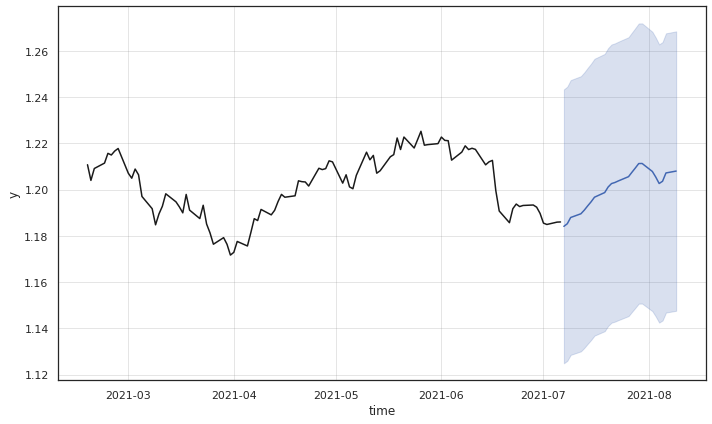

In [ ]:
m.plot()
# pd.plotting.register_matplotlib_converters()
# %matplotlib inline

# fig = m.plot()
# plt.xlim('2021-01-05 00:00:00','2021-12-06 12:00:00')
# plt.ylim(1.16,1.23)

In [ ]:
# #try CUSUM
# import numpy as np

# from kats.consts import TimeSeriesData
# from kats.detectors.cusum_detection import CUSUMDetector

# #changepoints
# change_points = CUSUMDetector(eurusd15_ts).detector()
# change_points.plot()
 

In [ ]:
#do the below after ensemble

In [ ]:
# #preprocessing complete, start model
# from kats.consts import TimeSeriesData
# eurusd15_ts = TimeSeriesData(eurusd15_df)

In [ ]:
# #GetMetaData
# from kats.models.metalearner.get_metadata import GetMetaData
# MD = GetMetaData(data = eurusd15_ts)